Data imported successfully


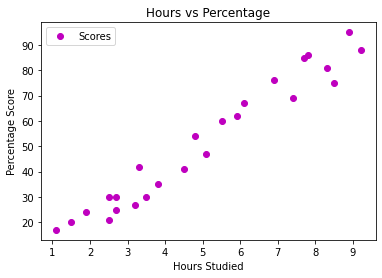

Training completed.


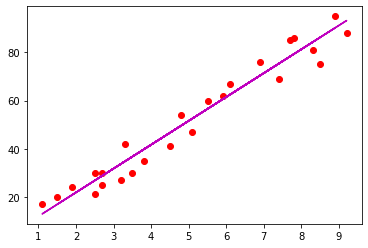

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
For a student studying 9.25 hours a day the predicted score is : 93.69173248737539
Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


In [1]:
#Jinit Joshi

#importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
# %matplotlib inline

#reading dataset from remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

#checking the first 10 rows of the imported dataset
student_data.head(10)

#checking the dataset shape i.e num of rows and cols
student_data.shape

#describe the datset in terms of mean,min,max,count etc.
student_data.describe()

"""## Data Visulaisation"""

# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='om')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

"""## Preparing the data
Divide the data into the attributes and the output/label for those attributes.Here the "score" is the output and "hours" studied by the attribute.
"""

X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values

"""Now we split the dataset into training and test sets using scikit-learn train_test_split() method.
Here we split the datset in 80/20 ratio.
"""

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

"""Training the algorithm using Linear Regression"""

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training completed.")

# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,c='r')
#plt.scatter()
plt.plot(X,line,'m')
plt.show()

"""## Making Prediction"""

print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

"""## What will be predicted score if a student studies for 9.25 hrs/ day? """

hours = np.array(9.25)
hours_new = hours.reshape(-1,1)
main_pred = regressor.predict(hours_new)
print("For a student studying 9.25 hours a day the predicted score is : {}".format(main_pred[0]))

"""Error Calculation"""

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))